# Building Model to Predict Survivors of Titanic Disaster using KNN and Logistic Regression with and without L2 regularizer

###### NOTE: KNN and Logistic Regression with and without regularizer on Binary X-entropy are from my own library otherwise sklearn.linear_model.LogisticRegression or sklearn.neighbors.KNeighborsClassifier can be used

# Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way
       -Parent = mother, father
       -Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
exec(open("logistic_reg.py").read())
#####
#customers = pd.read_csv('Ecommerce Customers');
#X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']];
#Y = customers['Yearly Amount Spent'];

data = pd.read_csv('titanic_train.csv');
col = data.columns;
num_data = data.to_numpy()
num_data = num_data
data.head()

#CENTERING AND SCALING
#for c in range(0,len(col)-1):
#    num_data[0:,c]=(num_data[0:,c]-np.mean(num_data[0:,c]));

#y_pred,w,b = logistic_reg(X,Y,l,noit)


#titanic = pd.read_csv('titanic_train.csv');

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA PREPARATION-ANALYSIS &  CLEANING

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived'>

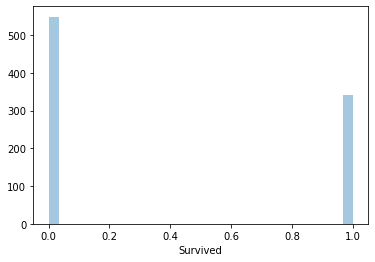

In [4]:
sns.distplot(data['Survived'],kde=False, bins=30)
#Class imbalance in target

<AxesSubplot:xlabel='Survived', ylabel='count'>

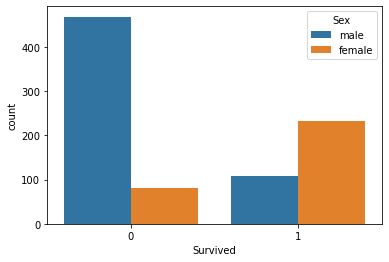

In [5]:
sns.countplot(x='Survived',data=data,hue='Sex')
#More males died than females and more females were saved than males

<AxesSubplot:>

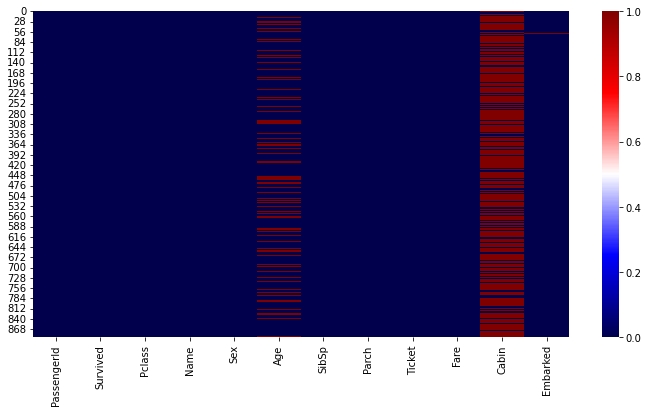

In [6]:
data.head()
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),cmap='seismic')
#Large null values in Age, Cabin

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    24.0
dtype: float64

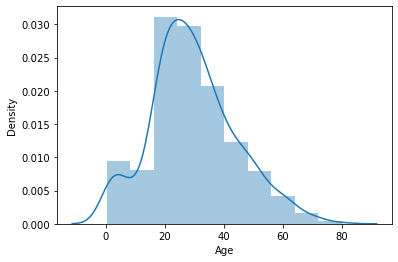

In [7]:
sns.distplot(data['Age'], bins=10)
#sns.countplot(x='Age',data = data, hue='Survived')

#Bimodal distribution with mean age 29 years with 24 years being the most common age/mode
#Also, marked by younger population in the 
#data['Age'].mean()
data['Age'].mode()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

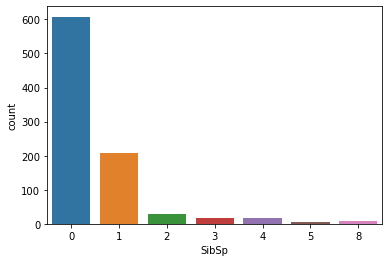

In [8]:
sns.countplot(x='SibSp',data=data)

<AxesSubplot:>

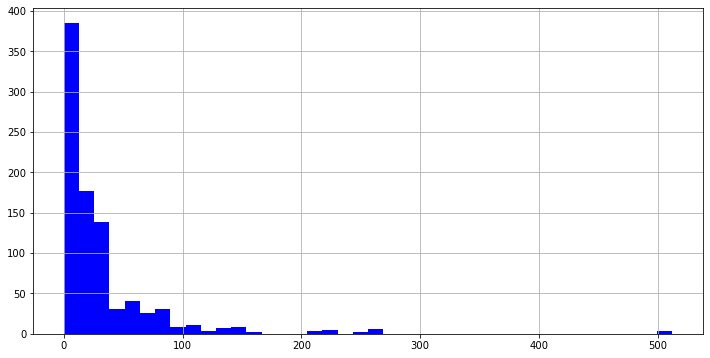

In [9]:
data['Fare'].hist(color='blue',bins=40,figsize=(12,6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

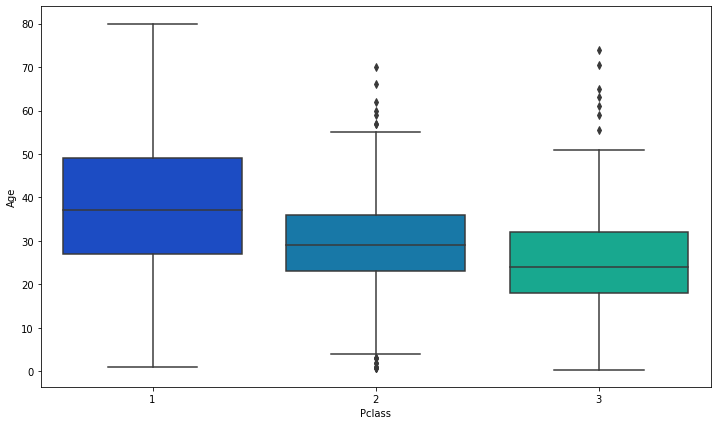

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')
#Age is higher for higher classes like P1, P2, P3  
#Using approximations from here to fill null values in age

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    24.0
dtype: float64

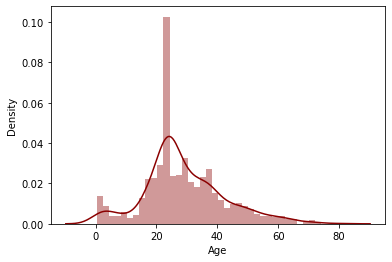

In [12]:
sns.distplot(data['Age'].dropna(),kde=True,color='darkred',bins=40)
data['Age'].dropna().mean()#29 years
data['Age'].dropna().mode()#24 years

<AxesSubplot:>

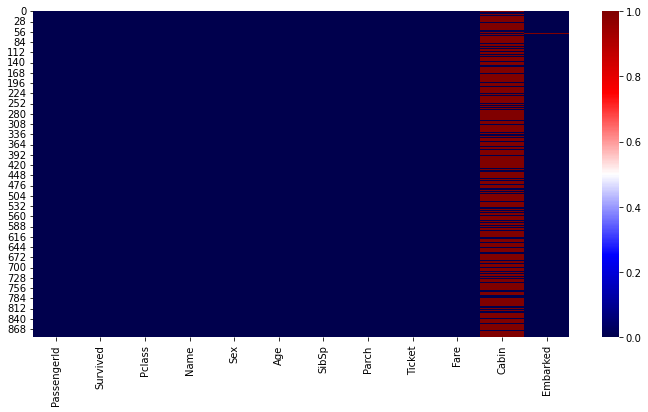

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),cmap='seismic')
#too many null values in Cabin

In [14]:
data.head()
#Cabin can be dropped-could've given information about the deck, levels, room-partners

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.drop('Cabin', axis=1,inplace=True)

<AxesSubplot:>

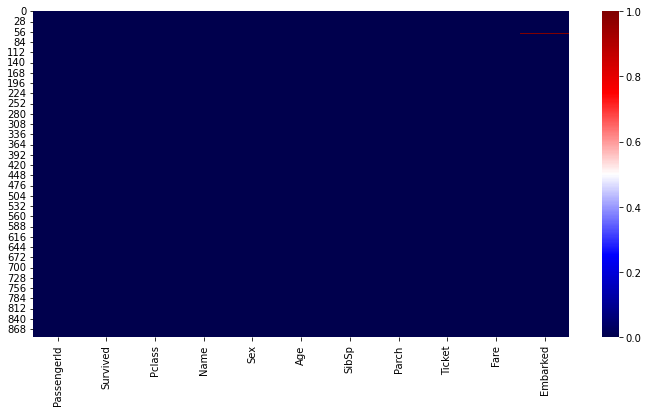

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),cmap='seismic')
#Still some null values in Embarked

<AxesSubplot:>

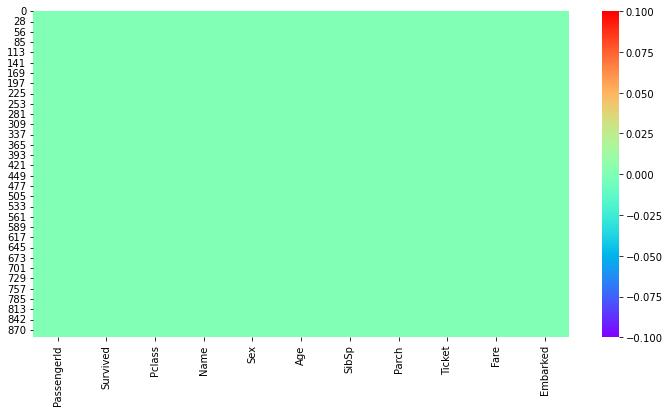

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(data.dropna().isnull(),cmap='rainbow')
#Null values dropped

<AxesSubplot:xlabel='Survived', ylabel='count'>

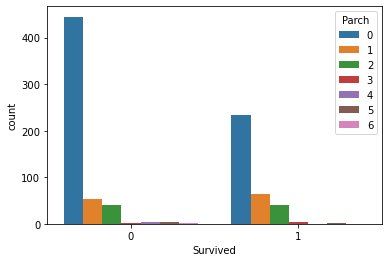

In [18]:
sns.countplot(x='Survived',data=data,hue='Parch')
#People without a parent child relationship seemed to form higher proportions of dead and are around 60%more than the survivors without children

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.5)

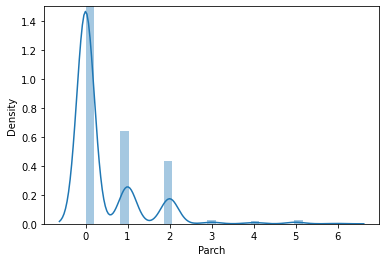

In [19]:
sns.distplot(data['Parch'])
plt.ylim([0,1.5])

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


def gender_map(s):
    if(s=='male'):
        return 1
    else:
        return 0
data['Sex']=data['Sex'].apply(lambda x:gender_map(x))

In [23]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
gender= pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],'Parch',drop_first=True)
data = pd.concat([data,gender,embark],axis=1)

In [25]:
data.head()
data.drop(['Sex','Embarked'],axis=1,inplace=True)
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Parch_Q,Parch_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
Pclass = pd.get_dummies(data['Pclass'],drop_first=True)
data = pd.concat([data,Pclass],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Parch_Q,Parch_S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [27]:
data.drop(['Pclass'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Parch_Q,Parch_S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


<AxesSubplot:xlabel='SibSp', ylabel='count'>

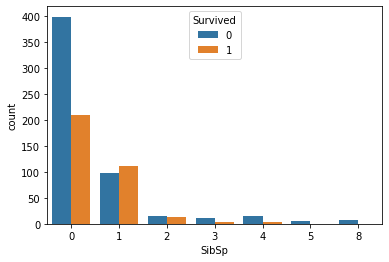

In [28]:
sns.countplot(x='SibSp',data=data,hue='Survived')

In [29]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
scaler.fit_transform(X);

In [31]:
noit = 200;
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Building & Testing Logistic Regression Classifier 

In [32]:
exec(open("logistic_reg.py").read())#Simple L2 loss without regularizer

Logistic Regression
initial weights:  [[0.94747067]
 [0.18600157]
 [0.70074621]
 [0.9340619 ]
 [0.59621668]
 [0.975848  ]
 [0.15424707]
 [0.35736091]
 [0.90888744]
 [0.12419958]]
initial bias:  [0.84912406]


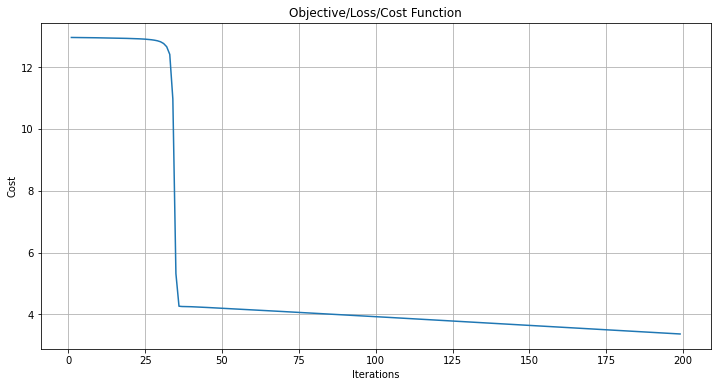

array([0.84434076])

In [33]:
l = 10**(-4);
y_pred,w,b = logistic_reg(X_train,Y_train,l,noit)
y_pred
w
b

In [34]:
classification_report, confusion_matrix = metrics(Y_train,y_pred)# Logistic Regression without regularizer

TP = 174
FP = 201
TN = 245
FN = 92


Classification Report


precision/PPV      0.464000
recall             0.654135
accuracy           0.588483
F1_score           0.542902
sensitivity/TPR    0.654135
specificity/TNR    0.549327
dtype: float64


CONFUSION MATRIX:


                Actual Positive  Actual Negative  Total
Model Positive              174              201    375
Model Negative               92              245    337
Total                       266              446    712


L2 regularized Logistic Regression
initial weights:  [[0.56265484]
 [0.48663002]
 [0.19218162]
 [0.36590693]
 [0.33453564]
 [0.96489599]
 [0.45460076]
 [0.99060625]
 [0.38406999]
 [0.96782315]]
initial bias:  [0.35118858]


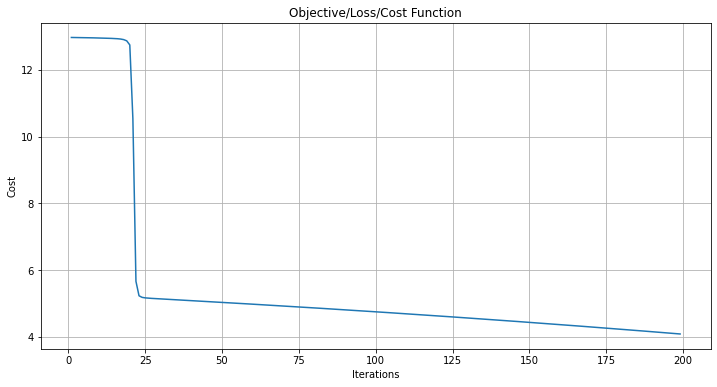

array([0.3462857])

In [35]:
exec(open("logistic_reg_L2.py").read())#l2 loss with L2 regularizer for penalization of loss function
l = 10**(-4);
reg = 10**(-2);
y_pred_L2,w_L2,b_L2 = logistic_reg_L2(X_train,Y_train,l,noit,reg)
y_pred_L2
w_L2
b_L2

In [36]:
classification_report_L2, confusion_matrix_L2 = metrics(Y_train,y_pred_L2)

TP0 = 172
FP0 = 228
TN0 = 218
FN0 = 94


Classification Report


precision/PPV      0.430000
recall             0.646617
accuracy           0.547753
F1_score           0.516517
sensitivity/TPR    0.646617
specificity/TNR    0.488789
dtype: float64


CONFUSION MATRIX:


                Actual Positive  Actual Negative  Total
Model Positive              172              228    400
Model Negative               94              218    312
Total                       266              446    712


In [37]:
X=X.to_numpy();
Y=Y.to_numpy();

# KNN Classifier

In [69]:
exec(open("knn_classifier.py").read())
r = 100;
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)
p= 2;
r = 170;
k =r;
accuracy = np.zeros([k,1]);
F1_score = np.zeros([k,1]);
for k in range(1,170):
    y_pred_knn = knn_classifier(X_train,Y_train,X_test,Y_test,p,k);
    #Y_test = np.reshape(Y_test,(179,1))
    classification_report, confusion_marix, accuracy[k-1],F1_score[k-1] = knn_metrics(Y_test,y_pred_knn);
#print(np.shape(y_pred_knn))
#print(np.shape(np.reshape(Y_test,(179,1))))

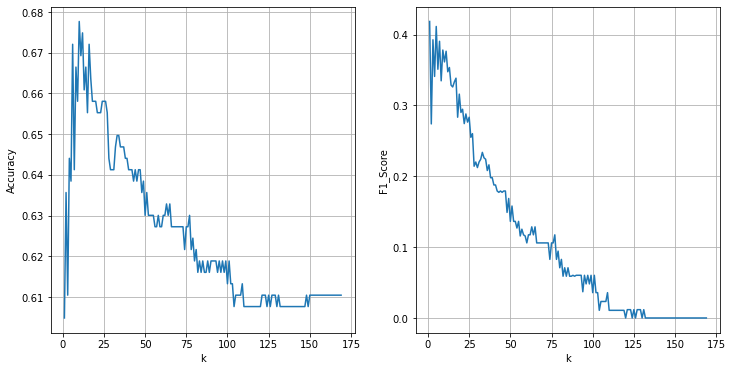

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(1,k+1),accuracy[0:k])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.subplot(1,2,2)
plt.plot(range(1,k+1),F1_score[0:k])
plt.xlabel('k')
plt.ylabel('F1_Score')
plt.grid()

In [77]:
exec(open("knn_classifier.py").read())
k = 12;#Optimum k for classification
y_pred_knn = knn_classifier(X_train,Y_train,X_test,Y_test,p,k);
#Y_test = np.reshape(Y_test,(179,1))
classification_report, confusion_marix, accuracy,F1_score = knn_metrics(Y_test,y_pred_knn);
print('CLASSIFICATION REPORT FOR KNN')
print(classification_report)
print('CONFUSION MATRIX for KNN')
print(confusion_matrix)

CLASSIFICATION REPORT FOR KNN
precision/PPV      0.733198
recall             0.258807
accuracy           0.674881
F1_score           0.347538
sensitivity/TPR    0.258807
specificity/TNR    0.939936
dtype: float64
CONFUSION MATRIX for KNN
                Actual Positive  Actual Negative  Total
Model Positive              174              201    375
Model Negative               92              245    337
Total                       266              446    712
